In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

with open('data/heroes.csv', 'r') as heroes_file:
  heroes_reader = csv.reader(heroes_file, delimiter=';', quotechar='"')
  heroes = list(heroes_reader)[1:]


In [2]:
years = [int(h[7]) if h[7] else None for h in heroes]
names = [h[0] for h in heroes]
first_appearance = pd.Series(years, index = names)

In [3]:
years=[int(h[7]) if h[7] else None for h in heroes]
names=[h[0] for h in heroes]
fullnames=[h[1] if h[1] else None for h in heroes]
first_appearance = pd.Series(years, index = fullnames)
first_appearance

Richard Milhouse Jones        2008.0
Abraxas                          NaN
Emil Blonsky                     NaN
None                             NaN
Sharon Carter                    NaN
                               ...  
Alan Ladd Wellington Scott    1940.0
None                          1960.0
Hank Pym                      1962.0
Francis                       1998.0
Alexander J. Mercer              NaN
Length: 735, dtype: float64

In [4]:
(first_appearance['Richard Milhouse Jones'])

2008.0

In [5]:
first_appearance = pd.Series(years, index = names)
first_appearance['Wonder Woman']

1941.0

In [6]:
first_appearance[130]

/tmp/ipykernel_35773/2239249670.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_appearance[130]


1998.0

In [7]:
first_appearance.iloc[130]

1998.0

In [8]:
first_appearance[13:23]

Angel Dust             NaN
Angel Salvadore     2001.0
Zoom                   NaN
Lady Deathstrike    1985.0
Yoda                1980.0
Zatanna                NaN
Yellowjacket II        NaN
Yellowjacket           NaN
Yellow Claw            NaN
Absorbing Man       1964.0
dtype: float64

In [9]:
first_appearance[(first_appearance>2012)]

Rey             2015.0
Kylo Ren        2015.0
Jyn Erso        2016.0
K-2SO           2016.0
Jessica Cruz    2013.0
Bloodhawk       2099.0
dtype: float64

In [10]:
absolutes=first_appearance.value_counts()
absolutes

1964.0    18
1963.0    18
1965.0    14
2004.0    11
1975.0    10
          ..
2013.0     1
1983.0     1
1933.0     1
1948.0     1
1988.0     1
Name: count, Length: 71, dtype: int64

In [11]:
absolutes=first_appearance[(first_appearance<2090) & (first_appearance>1933)].value_counts().sort_index()

In [12]:
absolutes

1939.0    1
1940.0    9
1941.0    7
1943.0    2
1944.0    2
         ..
2011.0    5
2012.0    2
2013.0    1
2015.0    2
2016.0    2
Name: count, Length: 69, dtype: int64

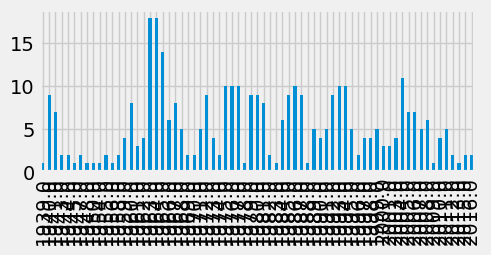

In [13]:
absolutes.plot.bar()
plt.show()

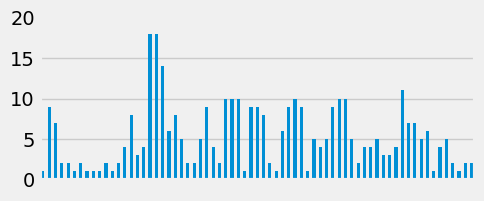

In [14]:
years=np.arange(19459,2010,10)
index_pos = [absolutes.index.get_loc(y) for y in years]
absolutes.plot.bar()
plt.xticks(index_pos,years)
plt.ylim(0,20)
plt.show()

In [15]:
[absolutes.index.get_loc(y) for y in years]

[]

In [16]:
absolutes.index.get_loc(1965.0)

19

In [17]:
absolutes.index

Index([1939.0, 1940.0, 1941.0, 1943.0, 1944.0, 1945.0, 1947.0, 1948.0, 1950.0,
       1954.0, 1955.0, 1956.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0,
       1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0,
       1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0,
       1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
       1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
       2000.0, 2001.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
       2010.0, 2011.0, 2012.0, 2013.0, 2015.0, 2016.0],
      dtype='float64')

In [20]:
heroes = pd.read_csv('data/heroes.csv', sep=';')
heroes.iloc[0]

Name                                A-Bomb
Identity            Richard Milhouse Jones
Birth place             Scarsdale, Arizona
Publisher                    Marvel Comics
Height                              203.21
Weight                              441.95
Gender                                   M
First appearance                    2008.0
Eye color                           Yellow
Hair color                         No Hair
Strength                             100.0
Intelligence                      moderate
Name: 0, dtype: object

In [23]:
heroes.loc['Gender':'Weight']

,Name,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence


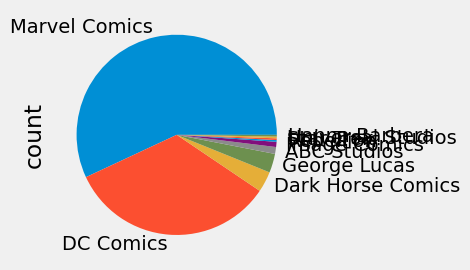

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))


heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)
heroes_with_year = heroes[heroes['First appearance'] < 2020]

heroes_with_year.head()
heroes_with_year['Publisher'].value_counts().plot.pie()
plt.show()